1 - Abrir as imagens DICOM:

- Ressonância
- Tomografia
- Radiografia

2 - Identificar a diferença entre cada uma delas (cores, formato, dimensão, quantidade de slice).

3 - Calcular o histograma das imagens e verificar os valores que cada uma tem

4 - Verificar se é possível gerar o plot 3d

5 - Como é possível fazer o janelamento das imagens

In [2]:
!pip install pydicom
import pydicom
from pydicom.data import get_testdata_file
import os
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
import copy
from skimage.metrics import structural_similarity
from PIL import Image
from scipy import ndimage

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path_ressonancia = r"/content/drive/MyDrive/PIM/Imagens/RM-AXIAL_T1_FS+C_1902"

path_radiografia = r"/content/drive/MyDrive/PIM/Imagens/RwC-Cerebral_2_fps_24"

path_tomografia = r"/content/drive/MyDrive/PIM/Imagens/TM-_Head_50_4"

###1 - Abrir as imagens DICOM:



#### Ressonância

> Abdomen normal

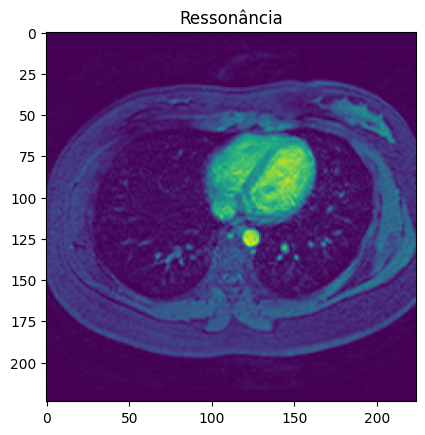

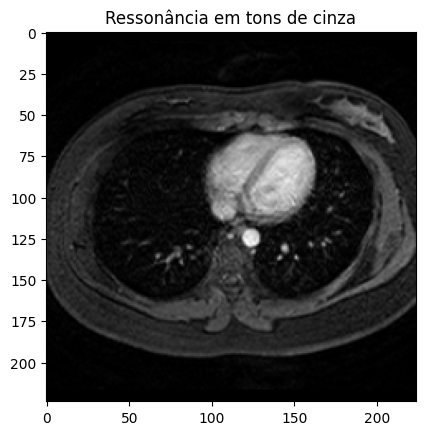

In [5]:
RM_image_title = "IM-0012-0023.dcm"

RM_path_complete = pydicom.data.data_manager.get_files(path_ressonancia,RM_image_title)[0]

RM_imag_dicom = pydicom.dcmread(RM_path_complete)

plt.figure(0)
plt.title('Ressonância')
plt.imshow(RM_imag_dicom.pixel_array)

plt.figure(1)
plt.title('Ressonância em tons de cinza')
plt.imshow(RM_imag_dicom.pixel_array, cmap = "gray")

#### Tomografia

> crânio normal

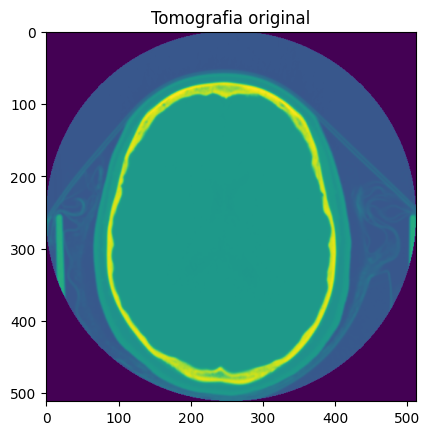

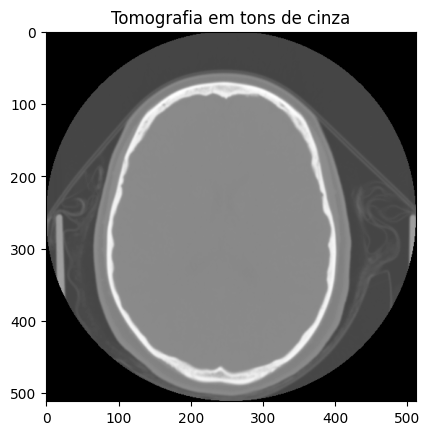

In [8]:
TC_imag_title = "IM-0001-0020.dcm"

TC_path_complete = pydicom.data.data_manager.get_files(path_tomografia,TC_imag_title)[0]

TC_imag_dicom = pydicom.dcmread(TC_path_complete)

plt.figure(2)
plt.title("Tomografia original")
plt.imshow(TC_imag_dicom.pixel_array)

plt.figure(3)
plt.title("Tomografia em tons de cinza")
plt.imshow(TC_imag_dicom.pixel_array, cmap = "gray")

#### Radiografia

> radiografia contrastada
> Arteriografia Cerebral


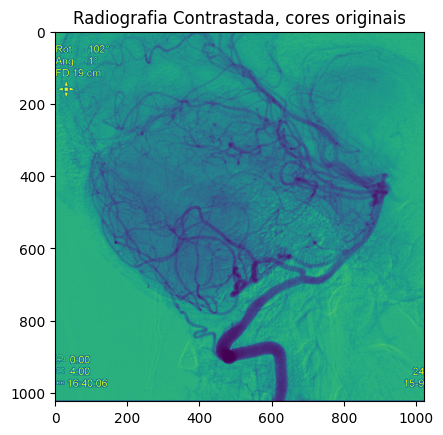

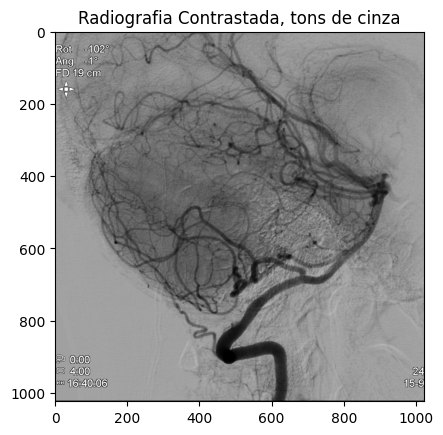

In [33]:
XR_imag_title =  "IM-0017-0009.dcm"

XR_path_complete = pydicom.data.data_manager.get_files(path_radiografia, XR_imag_title)[0]

XR_imag_dicom = pydicom.dcmread(XR_path_complete)

plt.figure(4)
plt.title("Radiografia Contrastada, cores originais")
plt.imshow(XR_imag_dicom.pixel_array)

plt.figure(5)
plt.title("Radiografia Contrastada, tons de cinza")
plt.imshow(XR_imag_dicom.pixel_array, cmap = "gray")

### 2 - Identificar a diferença entre cada uma delas (cores, formato, dimensão, quantidade de slice).

In [ ]:
#Ressonância Magnética
pixel_array = RM_imag_dicom.pixel_array

if len(pixel_array.shape) == 3 and pixel_array.shape[2] == 3:
    combined = pixel_array[:,:,0] * 256 * 256 + pixel_array[:,:,1] * 256 + pixel_array[:,:,2]
    unique_colors = np.unique(combined)
    print(f"A imagem DICOM colorida tem {len(unique_colors)} cores únicas.")
else:
    unique_colors = np.unique(pixel_array)
    print(f"A imagem DICOM em escala de cinza tem {len(unique_colors)} valores únicos de pixel.")
print(f"Número de cores únicas: {len(unique_colors)}")


A imagem DICOM em escala de cinza tem 682 valores únicos de pixel.
Número de cores únicas: 682


In [ ]:
#Tomografia Computadorizada
pixel_array = TC_imag_dicom.pixel_array

if len(pixel_array.shape) == 3 and pixel_array.shape[2] == 3:
    combined = pixel_array[:,:,0] * 256 * 256 + pixel_array[:,:,1] * 256 + pixel_array[:,:,2]
    unique_colors = np.unique(combined)
    print(f"A imagem DICOM colorida tem {len(unique_colors)} cores únicas.")
else:
    unique_colors = np.unique(pixel_array)
    print(f"A imagem DICOM em escala de cinza tem {len(unique_colors)} valores únicos de pixel.")
print(f"Número de cores únicas: {len(unique_colors)}")

A imagem DICOM em escala de cinza tem 2827 valores únicos de pixel.
Número de cores únicas: 2827


In [ ]:
#Radiográfia Contrastada
pixel_array = XR_imag_dicom.pixel_array

if len(pixel_array.shape) == 3 and pixel_array.shape[2] == 3:
    combined = pixel_array[:,:,0] * 256 * 256 + pixel_array[:,:,1] * 256 + pixel_array[:,:,2]
    unique_colors = np.unique(combined)
    print(f"A imagem DICOM colorida tem {len(unique_colors)} cores únicas.")
else:
    unique_colors = np.unique(pixel_array)
    print(f"A imagem DICOM em escala de cinza tem {len(unique_colors)} valores únicos de pixel.")
print(f"Número de cores únicas: {len(unique_colors)}")

A imagem DICOM em escala de cinza tem 626 valores únicos de pixel.
Número de cores únicas: 626


Dimensões

In [ ]:
print('Shape da Ressonância Magnética')
print(RM_imag_dicom.pixel_array.shape)

print('\n\n')

print('Shape da Tomografia Computadorizada')
print(TC_imag_dicom.pixel_array.shape)

print('\n\n')

print('Shape da Radiográfia Contrastada')
print(XR_imag_dicom.pixel_array.shape)

Shape da Ressonância Magnética
(224, 224)



Shape da Tomografia Computadorizada
(512, 512)



Shape da Radiográfia Contrastada
(1024, 1024)


Pixels de corte em slices

In [ ]:
print('Ressonância:')
print({RM_imag_dicom.get('SliceLocation' , '(missing)')})

print('\n')

print('Tomografia:')
print({TC_imag_dicom.get('SliceLocation' , '(missing)')})

print('\n')

print('Radiografia Contrastada:')
print({XR_imag_dicom.get('SliceLocation' , '(missing)')})

Quantidade de slices

In [ ]:
RM_files = os.listdir(path_ressonancia)
RM_files.sort()
print('Quantidade de Slices da Ressonância')
print(len(RM_files))

print('\n')

TC_files = os.listdir(path_tomografia)
TC_files.sort()
print('Quantidade de Slices da Tomografia')
print(len(TC_files))

print('\n')

XR_files = os.listdir(path_radiografia)
XR_files.sort()
print('Quantidade de Slices da Radiografia Contrastada')
print(len(XR_files))

Quantidade de Slices da Ressonância
23


Quantidade de Slices da Tomografia
38


Quantidade de Slices da Radiografia Contrastada
4


### 3 - Calcular o histograma das imagens e verificar os valores que cada uma tem

(array([[ 6.,  0.,  0., ...,  0.,  0.,  0.],
        [ 6.,  0.,  0., ...,  0.,  1.,  1.],
        [52.,  0.,  0., ...,  1.,  0.,  4.],
        ...,
        [20.,  0.,  0., ...,  0.,  0.,  0.],
        [ 1.,  0.,  0., ...,  0.,  0.,  0.],
        [ 1.,  0.,  0., ...,  0.,  0.,  0.]]),
 array([  0. ,  82.4, 164.8, 247.2, 329.6, 412. , 494.4, 576.8, 659.2,
        741.6, 824. ]),
 <a list of 1024 BarContainer objects>)

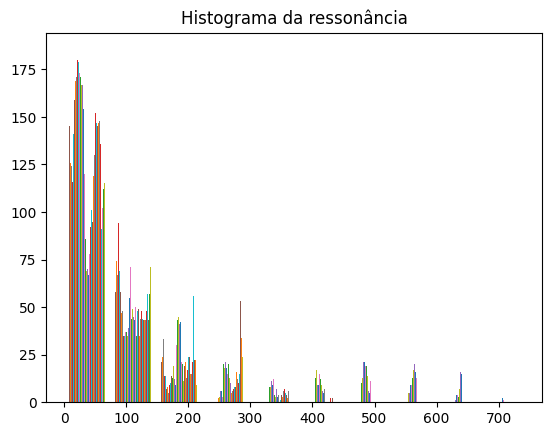

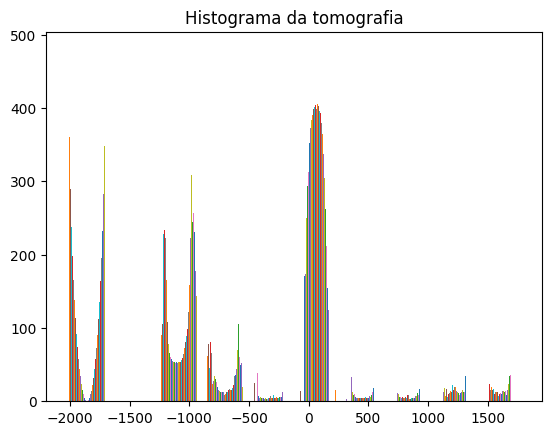

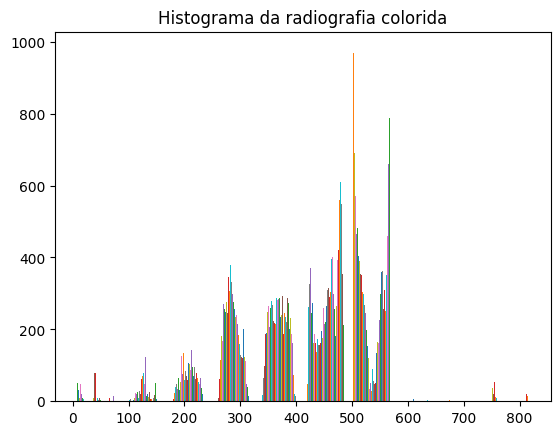

In [34]:
plt.figure(7)
plt.title('Histograma da ressonância')
plt.hist(RM_imag_dicom.pixel_array)

print('\n\n')

plt.figure(8)
plt.title('Histograma da tomografia')
plt.hist(TC_imag_dicom.pixel_array)

print('\n\n')

plt.figure(9)
plt.title('Histograma da radiografia colorida')
plt.hist(XR_imag_dicom.pixel_array)

(array([ 11027.,  20019.,  55847., 161468., 194896., 291258., 308463.,
           491.,    310.,   4797.]),
 array([  0. ,  82.4, 164.8, 247.2, 329.6, 412. , 494.4, 576.8, 659.2,
        741.6, 824. ]),
 <BarContainer object of 10 artists>)

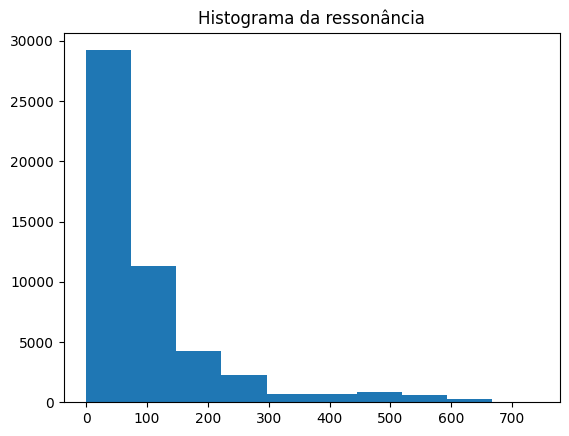

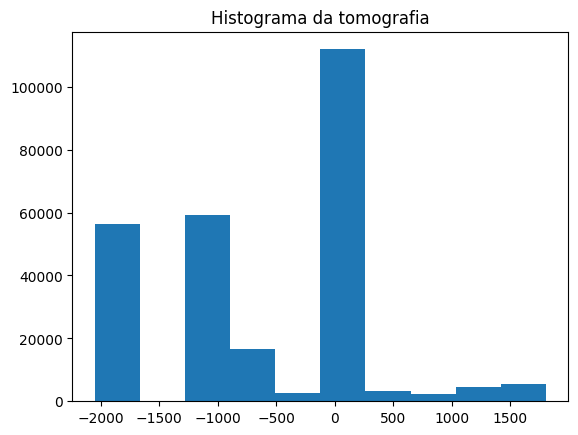

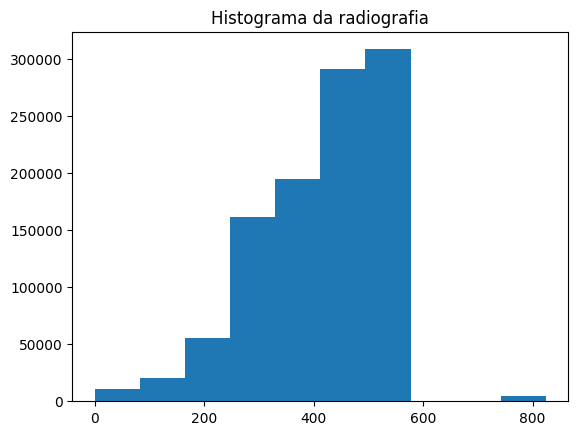

In [ ]:
plt.figure(10)
plt.title('Histograma da ressonância')
plt.hist(RM_imag_dicom.pixel_array.ravel())

print('\n\n')

plt.figure(11)
plt.title('Histograma da tomografia')
plt.hist(TC_imag_dicom.pixel_array.ravel())

print('\n\n')

plt.figure(12)
plt.title('Histograma da radiografia')
plt.hist(XR_imag_dicom.pixel_array.ravel())

### 4 - Verificar se é possível gerar o plot 3d

### 5 - Como é possível fazer o janelamento das imagens

#### Ressonância

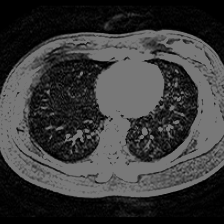

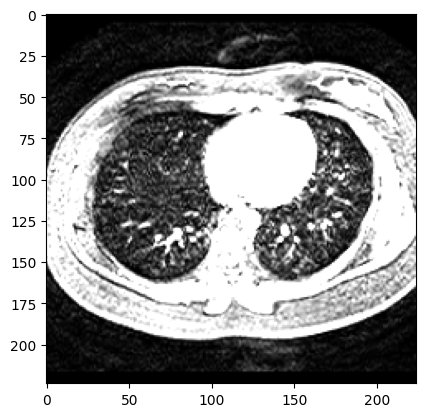

In [41]:
def make_jan(image, janelamento: list):
        """Janelamento : Lista com o valor mínimo e máximo de janela, transforma esse valor em um array numpy"""
        min_valor = min(janelamento)
        max_valor = max(janelamento)
        imagem_janelada = np.copy(image)
        imagem_janelada[image < min_valor] = min_valor
        imagem_janelada[image > max_valor] = max_valor
        return imagem_janelada

janela_resso = make_jan(RM_imag_dicom.pixel_array,[0,120])
cv2_imshow(janela_resso)
plt.imshow(janela_resso, cmap="gray")

(array([16119.,  4621.,  2993.,  2096.,  1573.,  1449.,  1585.,  1938.,
         2038., 15764.]),
 array([  0.,  12.,  24.,  36.,  48.,  60.,  72.,  84.,  96., 108., 120.]),
 <BarContainer object of 10 artists>)

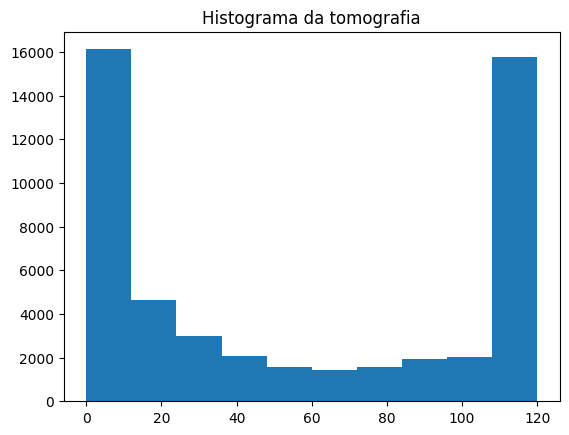

In [30]:
plt.figure(17)
plt.title('Histograma da tomografia')
plt.hist(janela_resso.ravel())

#### Tomografia

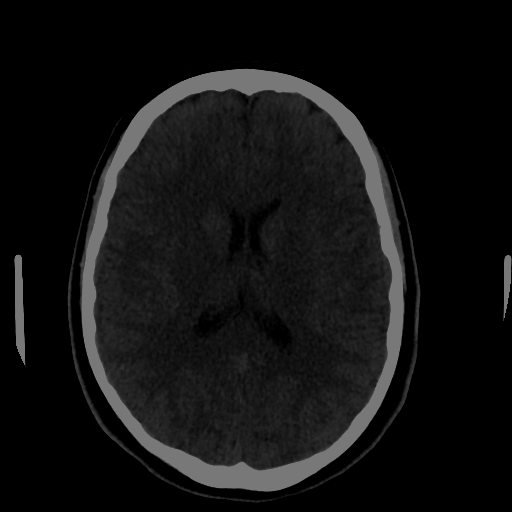

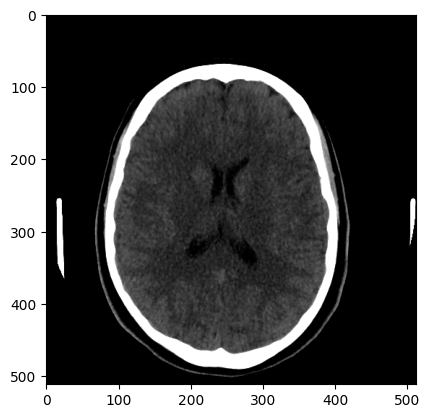

In [25]:
def make_jan(image, janelamento: list):
        """Janelamento : Lista com o valor mínimo e máximo de janela, transforma esse valor em um array numpy"""
        min_valor = min(janelamento)
        max_valor = max(janelamento)
        imagem_janelada = np.copy(image)
        imagem_janelada[image < min_valor] = min_valor
        imagem_janelada[image > max_valor] = max_valor
        return imagem_janelada

test_janelamento = make_jan(TC_imag_dicom.pixel_array,[0,120])
cv2_imshow(test_janelamento)
plt.imshow(test_janelamento, cmap="gray")

(array([151558.,  40818.,  40889.,   7113.,   1716.,   1164.,    583.,
           379.,    288.,  17636.]),
 array([  0.,  12.,  24.,  36.,  48.,  60.,  72.,  84.,  96., 108., 120.]),
 <BarContainer object of 10 artists>)

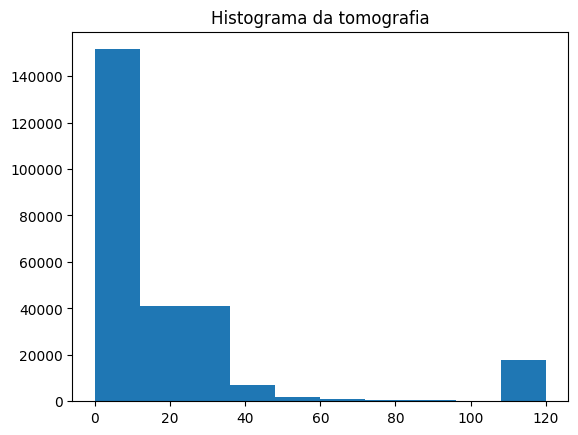

In [26]:
plt.figure(15)
plt.title('Histograma da tomografia')
plt.hist(test_janelamento.ravel())

#### Radiografia

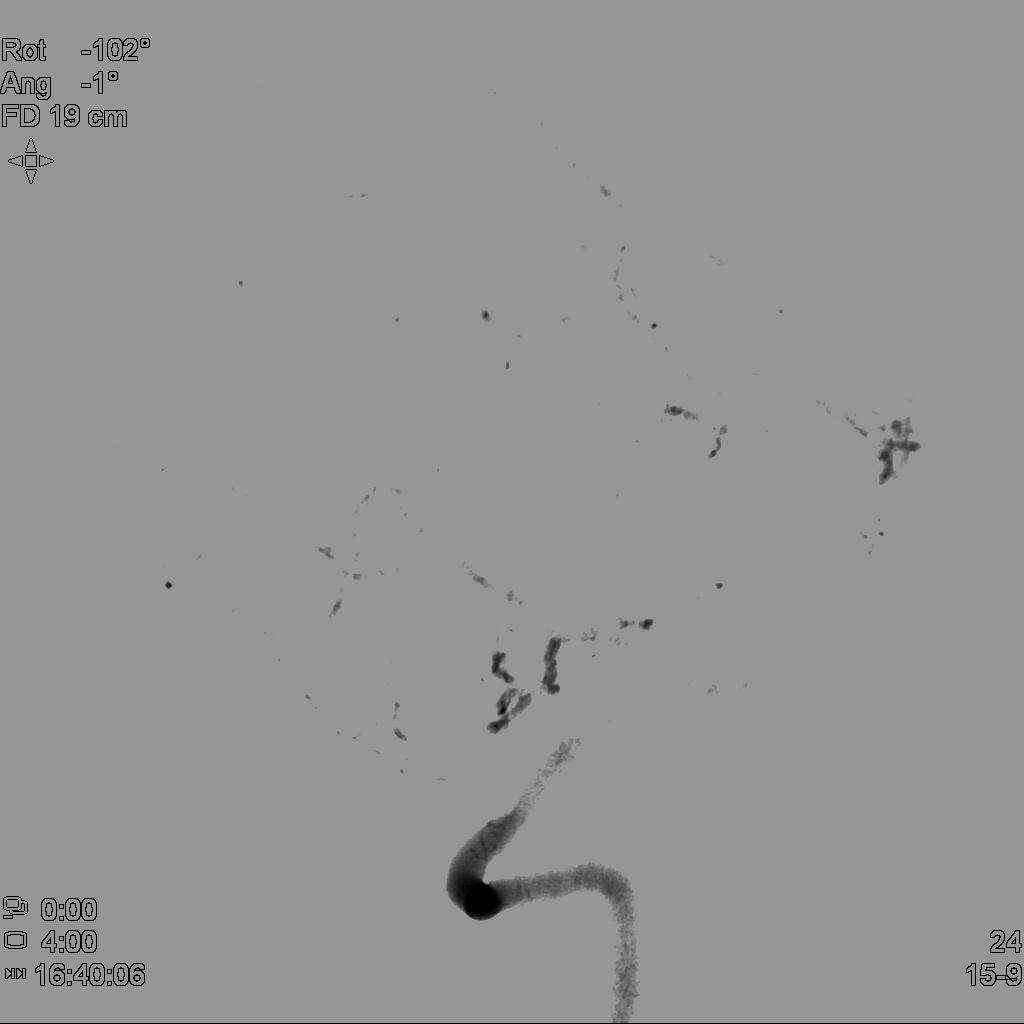

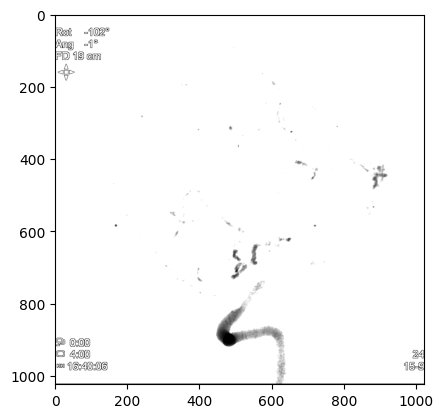

In [38]:
def make_jan(image, janelamento: list):
        """Janelamento : Lista com o valor mínimo e máximo de janela, transforma esse valor em um array numpy"""
        min_valor = min(janelamento)
        max_valor = max(janelamento)
        imagem_janelada = np.copy(image)
        imagem_janelada[image < min_valor] = min_valor
        imagem_janelada[image > max_valor] = max_valor
        return imagem_janelada

janela_radio = make_jan(XR_imag_dicom.pixel_array,[0,150])
cv2_imshow(janela_radio)
plt.imshow(janela_radio, cmap="gray")

(array([6.411000e+03, 3.550000e+02, 4.270000e+02, 9.910000e+02,
        1.801000e+03, 2.173000e+03, 2.757000e+03, 3.209000e+03,
        3.670000e+03, 1.026782e+06]),
 array([  0.,  15.,  30.,  45.,  60.,  75.,  90., 105., 120., 135., 150.]),
 <BarContainer object of 10 artists>)

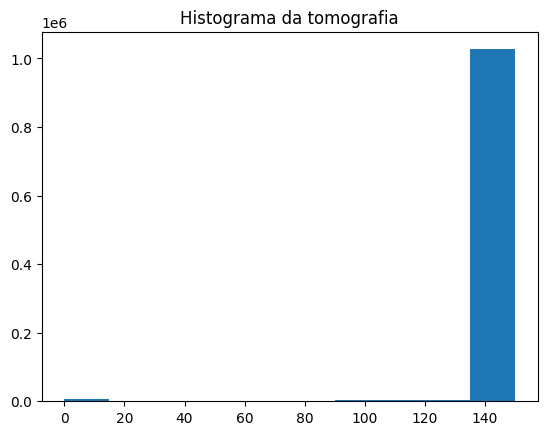

In [39]:
plt.figure(18)
plt.title('Histograma da tomografia')
plt.hist(janela_radio.ravel())